<a href="https://colab.research.google.com/github/ANTRIKSH-GANJOO/pytorch_research/blob/main/Pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
import torch
model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/chenyaofo/pytorch-cifar-models/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/chenyaofo/pytorch-cifar-models/releases/download/resnet/cifar10_resnet20-4118986f.pt" to /root/.cache/torch/hub/checkpoints/cifar10_resnet20-4118986f.pt
100%|██████████| 1.09M/1.09M [00:00<00:00, 90.7MB/s

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:13<00:00, 12838706.04it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

CifarResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [15]:
# Training the Neural Network
total = 0.0
correct = 0.0
train_running_loss = 0.0
num_epoch = 30
train_acc_list = []
model.train()
for epoch in range(num_epoch):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device) # pushing to GPU
        # zero the parameter gradients
        #print("Check cuda", inputs.is_cuda)
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        train_running_loss += loss.item()
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

    print(f'[{epoch + 1}] Train loss: {train_running_loss / total:.3f}')
    print(f'Epoch: {epoch+1}, Train Accuracy: {100 * correct // total} %')

print('Finished Training')



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[1] Train loss: 0.188
Epoch: 1, Train Accuracy: 76.0 %
[2] Train loss: 0.162
Epoch: 2, Train Accuracy: 79.0 %
[3] Train loss: 0.146
Epoch: 3, Train Accuracy: 81.0 %
[4] Train loss: 0.134
Epoch: 4, Train Accuracy: 82.0 %
[5] Train loss: 0.125
Epoch: 5, Train Accuracy: 84.0 %
[6] Train loss: 0.117
Epoch: 6, Train Accuracy: 84.0 %
[7] Train loss: 0.110
Epoch: 7, Train Accuracy: 85.0 %
[8] Train loss: 0.105
Epoch: 8, Train Accuracy: 86.0 %
[9] Train loss: 0.100
Epoch: 9, Train Accuracy: 87.0 %
[10] Train loss: 0.095
Epoch: 10, Train Accuracy: 87.0 %
[11] Train loss: 0.091
Epoch: 11, Train Accuracy: 88.0 %
[12] Train loss: 0.087
Epoch: 12, Train Accuracy: 88.0 %
[13] Train loss: 0.083
Epoch: 13, Train Accuracy: 89.0 %
[14] Train loss: 0.080
Epoch: 14, Train Accuracy: 89.0 %
[15] Train loss: 0.077
Epoch: 15, Train Accuracy: 90.0 %
[16] Train loss: 0.074
Epoch: 16, Train Accuracy: 90.0 %
[17] Train loss: 0.072
Epoch: 17, Train Accuracy: 90.0 %
[18] Train loss: 0.069
Epoch: 18, Train Accuracy:

In [17]:
print(len(train_acc_list))

375000


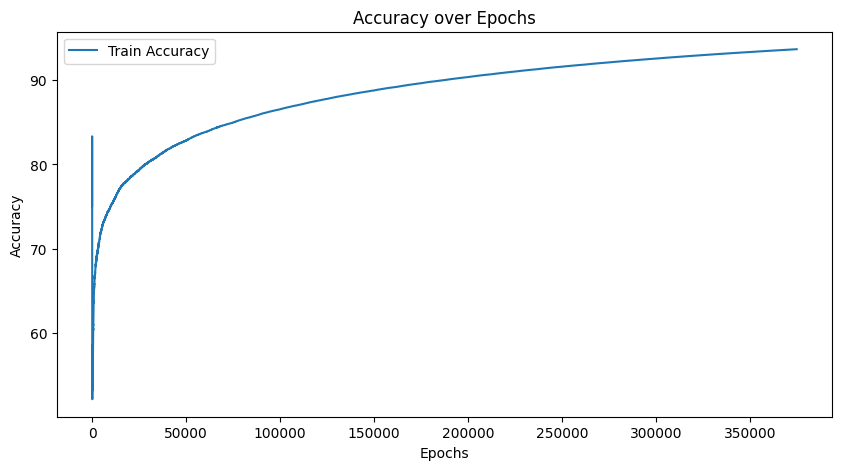

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(train_acc_list, label='Train Accuracy')
#plt.plot(test_acc_list, label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
total = 0.0
correct = 0.0
test_loss = 0.0
test_acc_list = []
model.eval()

with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device) # pushing to GPU
        # zero the parameter gradients
        #print("Check cuda", inputs.is_cuda)
        #optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        #loss.backward()
        #optimizer.step()

        # print statistics
        test_loss += loss.item()
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
        test_acc_list.append(test_acc)
        #if i % 2000 == 1999:    # print every 2000 mini-batches
    #print(f'[{epoch + 1}] loss: {running_loss / total:.3f}')

    print(f'Test Accuracy: {100 * correct / total} %')

print('Finished Testing')

Test Accuracy: 88.79 %
Finished Testing


In [13]:
print(len(test_acc_list))

2500


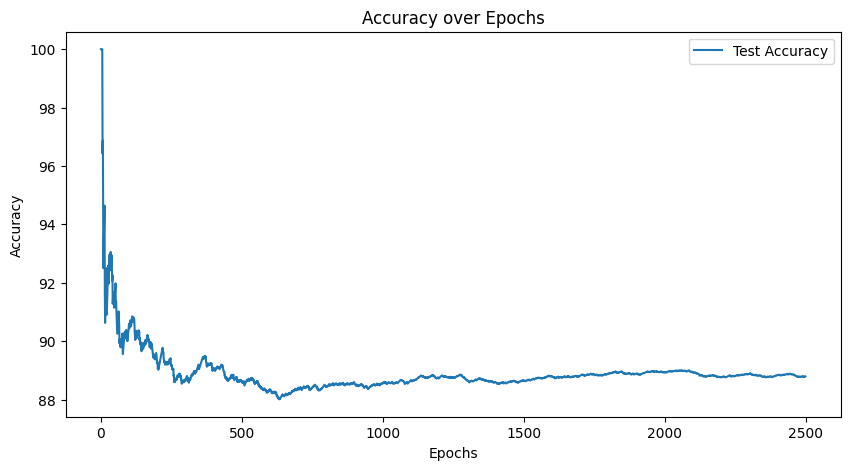

In [19]:
plt.figure(figsize=(10, 5))
#plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F